In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


len(x_train), len(x_test)

(25000, 25000)

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/Users/gw/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 155ms/step - accuracy: 0.7122 - loss: 0.5422 - val_accuracy: 0.8426 - val_loss: 0.3772
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 163ms/step - accuracy: 0.8490 - loss: 0.3665 - val_accuracy: 0.8342 - val_loss: 0.3838
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.8471 - loss: 0.3555 - val_accuracy: 0.8392 - val_loss: 0.4112
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.8956 - loss: 0.2657 - val_accuracy: 0.8517 - val_loss: 0.3584
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 168ms/step - accuracy: 0.9103 - loss: 0.2386 - val_accuracy: 0.5811 - val_loss: 0.8072
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 163ms/step - accuracy: 0.8625 - loss: 0.3142 - val_accuracy: 0.8504 - val_loss: 0.3633
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 167ms/step - accuracy: 0.9473 - loss: 0.1491 - val_accuracy: 0.8535 - val_loss: 0.3981
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.9547 -

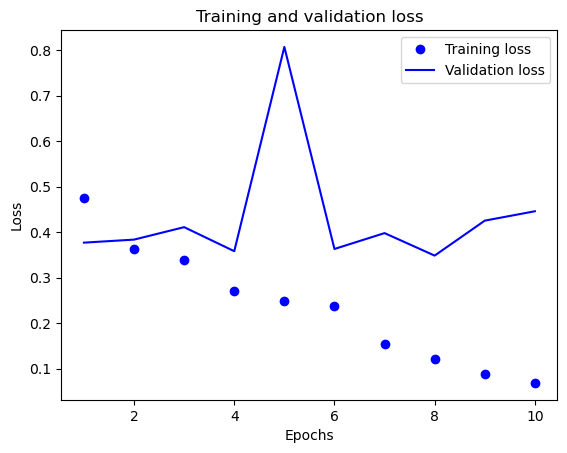

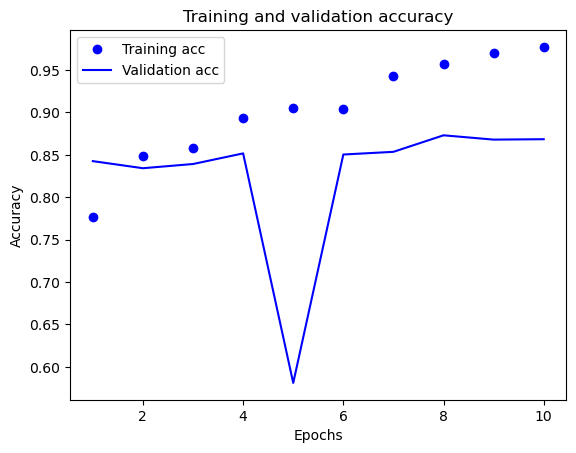

In [4]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()